Develop a program to demonstrate the working of Linear Regression and Polynomial Regression. Use
Boston Housing Dataset for Linear Regression and Auto MPG Dataset (for vehicle fuel efficiency prediction)
for Polynomial Regression. 

# Linear and Polynomial Regression Demonstration

## How Regression Models Work

### Linear Regression
- **Definition**: Finds the best-fitting straight line through the points
- **Formula**: y = mx + b (where m is slope, b is y-intercept)
- **California Housing Dataset**: Predicts home values based on average number of rooms

### Polynomial Regression
- **Definition**: Fits a polynomial equation to data rather than a straight line
- **Formula**: y = a₀ + a₁x + a₂x² + ... + aₙxⁿ 
- **Auto MPG Dataset**: Predicts vehicle efficiency (mpg) based on engine displacement using a quadratic curve

### Evaluation Metrics
- **Mean Squared Error (MSE)**: Average squared difference between predicted and actual values
- **R² Score**: Proportion of variance explained by the model (1.0 is perfect prediction)

<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dhana\AppData\Local\Temp\ipykernel_14832\3918558045.py:36: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(url, sep='\s+', names=cols, na_values="?").dropna()


Running Regression Model Demos



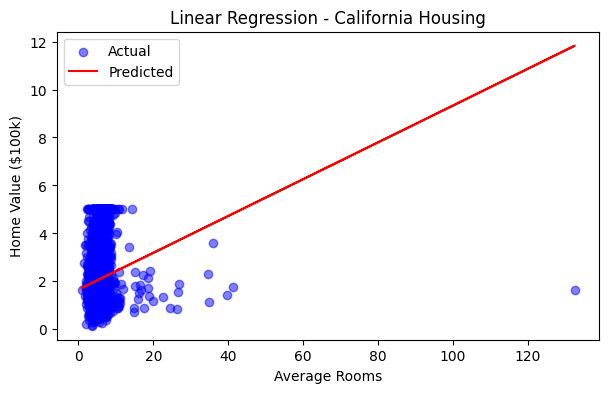

Linear Regression: MSE = 1.2923, R² = 0.0138


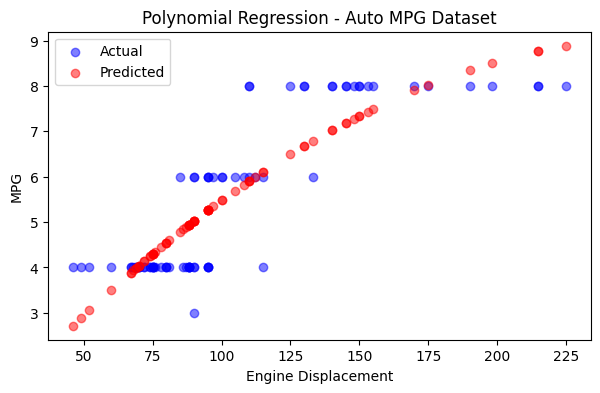

Polynomial Regression: MSE = 0.7431, R² = 0.7506


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

def linear_reg():
    # California Housing - Linear Regression
    housing = fetch_california_housing(as_frame=True)
    X, y = housing.data[["AveRooms"]], housing.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train and predict
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Visualize results
    plt.figure(figsize=(7, 4))
    plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
    plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.title("Linear Regression - California Housing")
    plt.xlabel("Average Rooms"), plt.ylabel("Home Value ($100k)")
    plt.legend()
    plt.show()
    
    print(f"Linear Regression: MSE = {mean_squared_error(y_test, y_pred):.4f}, R² = {r2_score(y_test, y_pred):.4f}")

def poly_reg():
    # Auto MPG - Polynomial Regression
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    cols = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
    data = pd.read_csv(url, sep='\s+', names=cols, na_values="?").dropna()
    
    # Prepare data and train model
    X = data["displacement"].values.reshape(-1, 1)
    y = data["mpg"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression()).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Visualize results
    plt.figure(figsize=(7, 4))
    plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
    plt.scatter(X_test, y_pred, color="red", alpha=0.5, label="Predicted")
    plt.title("Polynomial Regression - Auto MPG Dataset")
    plt.xlabel("Engine Displacement"), plt.ylabel("MPG")
    plt.legend()
    plt.show()
    
    print(f"Polynomial Regression: MSE = {mean_squared_error(y_test, y_pred):.4f}, R² = {r2_score(y_test, y_pred):.4f}")

# Run both regression demos
if __name__ == "__main__":
    print("Running Regression Model Demos\n")
    linear_reg()
    poly_reg()

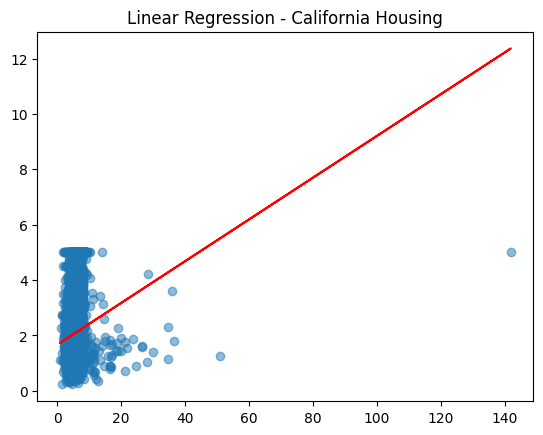

C:\Users\Dhana\AppData\Local\Temp\ipykernel_25552\539411791.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=cols, na_values='?').dropna()


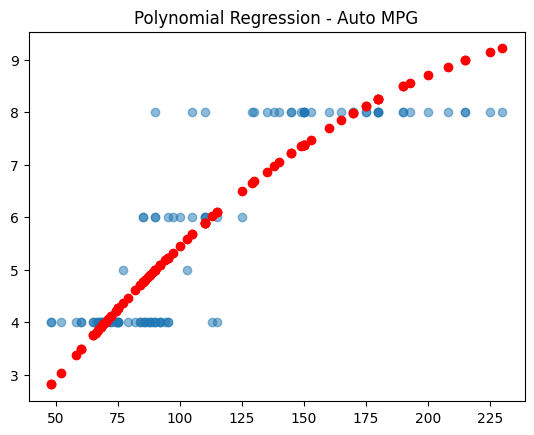

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# 1. Linear Regression on California Housing (AveRooms → House value)
data = fetch_california_housing(as_frame=True)
X = data.data[['AveRooms']]
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression().fit(X_train, y_train)

plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, model.predict(X_test), color='red')
plt.title("Linear Regression")
plt.show()

# 2. Polynomial Regression on Auto MPG (displacement → mpg)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
cols = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin"]
df = pd.read_csv(url, delim_whitespace=True, names=cols, na_values='?').dropna()

X = df[['displacement']]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression().fit(X_train_poly, y_train)

plt.scatter(X_test, y_test, alpha=0.5)
plt.scatter(X_test, model.predict(X_test_poly), color='red')
plt.title("Polynomial Regression")
plt.show()


Load datasets.

Split data into training and testing parts.

Train a Linear Regression model for California housing (simple line).

Train a Polynomial Regression model for Auto MPG (curved line).

Plot actual vs predicted values to visualize.